In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data ='C:/mentalhealthsystem/dataset/mental health emergegy alert.csv'
df = pd.read_csv(data, header=None)

In [4]:
# view dimension of dataset
df.shape

(2557, 10)

#### We can see that there are 1728 instances and 7 variables in the  dataset

In [5]:
# preview the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Student ID,Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Depression,Conflict,Mood Scale
1,1,1,7 to 8,Moderate,No,6,2,No,Yes,0.7
2,2,0,5 to 6,Unhealthy,Yes,0,4,No,Yes,0
3,3,1,5 to 6,Moderate,No,0,2,No,Yes,0
4,4,1,7 to 8,Healthy,Yes,1,2,No,Yes,0.2


## Rename columns names

In [6]:
col_names = ['student id', 'gender',  'sleep duration', 'dietary habits','have you ever had suicidal thoughts ?', 'study hours','financial stress','depression','conflict','mood scale']
df.columns = col_names  
print(col_names)

['student id', 'gender', 'sleep duration', 'dietary habits', 'have you ever had suicidal thoughts ?', 'study hours', 'financial stress', 'depression', 'conflict', 'mood scale']


In [7]:
# let's again preview the dataset
df.head()

,student id,gender,sleep duration,dietary habits,have you ever had suicidal thoughts ?,study hours,financial stress,depression,conflict,mood scale
0,Student ID,Gender,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Depression,Conflict,Mood Scale
1,1,1,7 to 8,Moderate,No,6,2,No,Yes,0.7
2,2,0,5 to 6,Unhealthy,Yes,0,4,No,Yes,0
3,3,1,5 to 6,Moderate,No,0,2,No,Yes,0
4,4,1,7 to 8,Healthy,Yes,1,2,No,Yes,0.2


## View summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   student id                             2557 non-null   object
 1   gender                                 2557 non-null   object
 2   sleep duration                         2557 non-null   object
 3   dietary habits                         2557 non-null   object
 4   have you ever had suicidal thoughts ?  2557 non-null   object
 5   study hours                            2557 non-null   object
 6   financial stress                       2557 non-null   object
 7   depression                             2557 non-null   object
 8   conflict                               2557 non-null   object
 9   mood scale                             2557 non-null   object
dtypes: object(10)
memory usage: 199.9+ KB


In [17]:
col_names = ['student id', 'gender', 'sleep duration', 'dietary habits','have you ever had suicidal thoughts ?', 'study hours','financial stress','depression','conflict','mood scale']

for col in col_names:
    print(df[col].value_counts())

student id
Student ID    1
1708          1
1701          1
1702          1
1703          1
             ..
853           1
854           1
855           1
856           1
2556          1
Name: count, Length: 2557, dtype: int64
gender
0         1333
1         1223
Gender       1
Name: count, dtype: int64
sleep duration
7 to 8            658
Less than 5       648
5 to 6            628
More than 8       622
Sleep Duration      1
Name: count, dtype: int64
dietary habits
Unhealthy         882
Healthy           842
Moderate          832
Dietary Habits      1
Name: count, dtype: int64
have you ever had suicidal thoughts ?
No                                       1307
Yes                                      1249
Have you ever had suicidal thoughts ?       1
Name: count, dtype: int64
study hours
10             218
9              210
2              206
11             205
0              204
5              197
6              195
3              192
1              191
12             191
7          

## Missing values in variables

In [18]:
# check missing values in variables

df.isnull().sum()

student id                               0
gender                                   0
sleep duration                           0
dietary habits                           0
have you ever had suicidal thoughts ?    0
study hours                              0
financial stress                         0
depression                               0
conflict                                 0
mood scale                               0
dtype: int64

## Declare feature vector and target variable

In [19]:
x = df.drop(['mood scale'], axis=1)
y = df['mood scale']

## Split data into separate training and test set

In [20]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

In [21]:
# Check the shape of x_train and x_test
x_train.shape,x_test.shape

((1713, 9), (844, 9))

In [22]:
x_train.head()


,student id,gender,sleep duration,dietary habits,have you ever had suicidal thoughts ?,study hours,financial stress,depression,conflict
591,591,0,7 to 8,Healthy,Yes,0,1,No,No
462,462,0,5 to 6,Unhealthy,No,4,4,No,No
1804,1804,1,More than 8,Moderate,No,11,5,No,No
45,45,1,Less than 5,Unhealthy,Yes,1,4,No,No
1272,1272,1,More than 8,Moderate,No,6,5,No,No


In [23]:
# import catogory encoders

import category_encoders as ce

In [24]:
# Encode variable with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['student id','gender','sleep duration', 'dietary habits','have you ever had suicidal thoughts ?', 'study hours','financial stress','depression','conflict'])

x_train = encoder.fit_transform(x_train)  
x_test = encoder.transform(x_test)       


In [25]:
x_train.head()

,student id,gender,sleep duration,dietary habits,have you ever had suicidal thoughts ?,study hours,financial stress,depression,conflict
591,1,1,1,1,1,1,1,1,1
462,2,1,2,2,2,2,2,1,1
1804,3,2,3,3,2,3,3,1,1
45,4,2,4,2,1,4,2,1,1
1272,5,2,3,3,2,5,3,1,1


## Random forest Classifier model with default parameters

In [26]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate the classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)

# Fit the model
rfc.fit(x_train, y_train)

# Predict the test set results
y_pred = rfc.predict(x_test)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision trees: 0.8945


###### Here y_test are the true class lables and y_pred are the predicted class lables in the test-test
Here, I have build the random forest classifier model with default parameter of
n_estimators = 10. so, I have used 10 decission -trees to build the model. Now i will
increase the number of decission-trees and see its effect on accuracy

## # Instantiate the classifier
rf_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model
rf_100.fit(x_train, y_train)

# Predict the test set results
y_pred_100 = rf_100.predict(x_test)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 100 decision trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))
Random Forest Classifier model with parameter n estimators=100

In [27]:
# Instantiate the classifier
rf_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model
rf_100.fit(x_train, y_train)

# Predict the test set results
y_pred_100 = rf_100.predict(x_test)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 100 decision trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred_100)))


Model accuracy score with 100 decision trees: 0.9668


In [28]:
# Instantiate the classifier
rf_150 = RandomForestClassifier(n_estimators=150, random_state=0)

# Fit the model
rf_150.fit(x_train, y_train)

# Predict the test set results
y_pred_150 = rf_150.predict(x_test)

# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 150 decision trees: {0:0.4f}'.format(accuracy_score(y_test, y_pred_150)))

Model accuracy score with 150 decision trees: 0.9692


## find important feature with Random forest model

###### Until now  i have used all the features given in the model, Now I will select only the important feature, build the model using these and see its effect on accuracy.first, i will create the random forest model as follws

In [30]:
# Create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model to the training set
clf.fit(x_train, y_train)


RandomForestClassifier(random_state=0)

In [32]:
# View the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

study hours                              0.705618
student id                               0.133612
financial stress                         0.042001
sleep duration                           0.037026
dietary habits                           0.028425
gender                                   0.018044
have you ever had suicidal thoughts ?    0.015049
depression                               0.011957
conflict                                 0.008269
dtype: float64

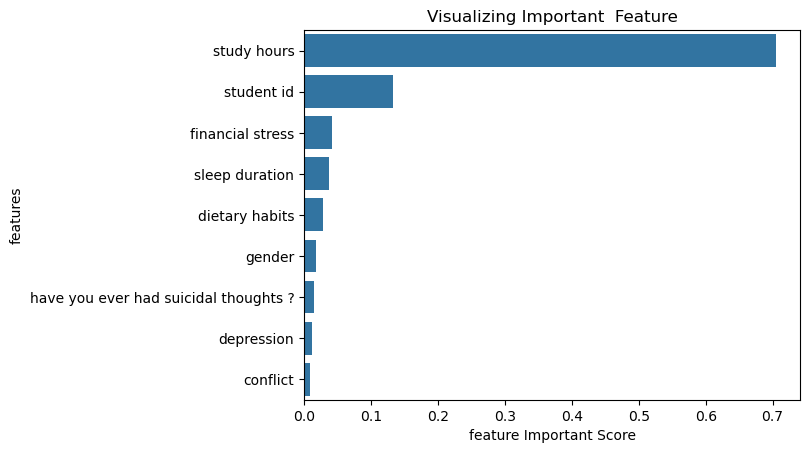

In [33]:
# creating a seaborn bar plot
sns.barplot(x=feature_scores,y=feature_scores.index)
#Add labels to the graph
plt.xlabel('feature Important Score')
plt.ylabel('features')
# Add title to the graph
plt.title("Visualizing Important  Feature")
# visualize the graph
plt.show()

In [34]:
# Define the feature vector (X) and target variable (y)
X = df.drop(['conflict', 'gender'], axis=1)
y = df['conflict']


In [35]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [36]:
import pandas as pd
import joblib

# Load the model
model_path = r'C:\mentalhealthsystem\model\stress_score_model.pkl'
model = joblib.load(model_path)

# Example input data (replace with actual values)
input_data = {
    'gender': [1],  # 1 for male, 0 for female
    'sleep': [1],   # 1 for good, 0 for poor
    'diet': [0],    # 1 for balanced, 0 for unbalanced
    'suicidal': [0],  # 1 for yes, 0 for no
    'study_hours': [4],
    'financial_stress': [3],
    'conflict': [0],
    'mood': [0.4],
    'depression': [0]
}

# Convert input to a DataFrame with the correct column names
input_df = pd.DataFrame(input_data)

# Predict stress score
predicted_score = model.predict(input_df)[0]

# Determine stress level
if predicted_score >= 75:
    stress_level = "High"
elif 60 <= predicted_score < 75:
    stress_level = "Normal"
else:
    stress_level = "Low"

# Output results
print(f"Predicted Stress Score: {predicted_score:.2f}")
print(f"Predicted Stress Level: {stress_level}")


Predicted Stress Score: 69.98
Predicted Stress Level: Normal


In [37]:
# Save model to the specified path
joblib.dump(model, r'C:\mentalhealthsystem\model\stress_score_model.pkl')


['C:\\mentalhealthsystem\\model\\stress_score_model.pkl']

In [39]:
# Example expanded test data (replace with actual data)
test_data = pd.DataFrame({
    'gender': [1, 0, 1, 0, 1, 0, 1, 0],  
    'sleep': [1, 0, 1, 0, 1, 1, 0, 0],   
    'diet': [0, 1, 0, 1, 1, 0, 1, 0],    
    'suicidal': [0, 1, 0, 0, 1, 0, 0, 1],  
    'study_hours': [4, 6, 3, 2, 5, 3, 4, 6],
    'financial_stress': [3, 5, 2, 4, 3, 4, 5, 2],
    'conflict': [0, 1, 0, 1, 0, 1, 1, 0],
    'mood': [0.4, 0.7, 0.3, 0.6, 0.5, 0.8, 0.2, 0.9],
    'depression': [0, 1, 0, 1, 0, 0, 1, 1]
})

# Actual stress levels (replace with actual ground truth labels)
actual_stress_levels = [0, 2, 0, 1, 1, 0, 2, 1]


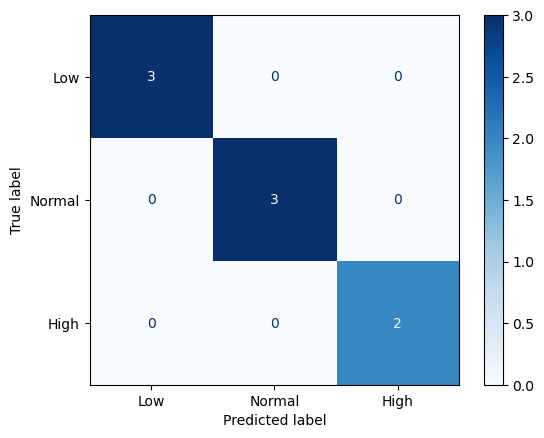

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example: Ensure both lists have the same length
actual_stress_levels = ['Low', 'Normal', 'High', 'Low', 'Normal', 'High', 'Low', 'High']
predicted_stress_levels = ['Low', 'Normal', 'High', 'Low', 'Normal', 'High', 'Low', 'High']  # Adjust to match

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual_stress_levels, predicted_stress_levels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Low', 'Normal', 'High'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [42]:
# Check lengths of actual and predicted stress levels
print(f"Length of actual stress levels: {len(actual_stress_levels)}")
print(f"Length of predicted stress levels: {len(predicted_stress_levels)}")


Length of actual stress levels: 8
Length of predicted stress levels: 8


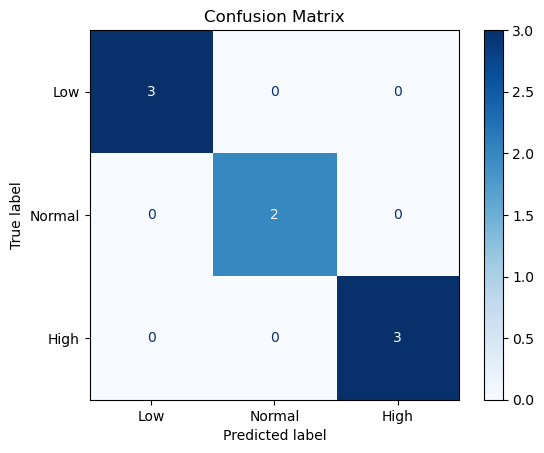

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual_stress_levels, predicted_stress_levels, labels=['Low', 'Normal', 'High'])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Low', 'Normal', 'High'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [45]:
from sklearn.metrics import classification_report

# Generate and display classification report
report = classification_report(actual_stress_levels, predicted_stress_levels, labels=['Low', 'Normal', 'High'])
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

         Low       1.00      1.00      1.00         3
      Normal       1.00      1.00      1.00         2
        High       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

